In [1]:
# Load CSV Using Python Standard Library 
# names is to List column names to use. 
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
from matplotlib import pyplot
from pandas import read_csv 
filename = 'diabetes.csv' 
#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename) 
data=data.rename(columns={"Pregnancies": "preg", "DiabetesPedigreeFunction": "pedi"})
print(data.shape)


(768, 9)


In [2]:
data.head(5)

,preg,Glucose,BloodPressure,SkinThickness,Insulin,BMI,pedi,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
class_counts = data.groupby('Outcome').size() 
print(class_counts)

Outcome
0    500
1    268
dtype: int64


In [4]:
from pandas import set_option
set_option('display.width', 120) 
set_option('precision', 2) 

correlations = data.corr(method='pearson') 

print(correlations)

               preg  Glucose  BloodPressure  SkinThickness  Insulin   BMI  pedi   Age  Outcome
preg           1.00     0.13           0.14          -0.08    -0.07  0.02 -0.03  0.54     0.22
Glucose        0.13     1.00           0.15           0.06     0.33  0.22  0.14  0.26     0.47
BloodPressure  0.14     0.15           1.00           0.21     0.09  0.28  0.04  0.24     0.07
SkinThickness -0.08     0.06           0.21           1.00     0.44  0.39  0.18 -0.11     0.07
Insulin       -0.07     0.33           0.09           0.44     1.00  0.20  0.19 -0.04     0.13
BMI            0.02     0.22           0.28           0.39     0.20  1.00  0.14  0.04     0.29
pedi          -0.03     0.14           0.04           0.18     0.19  0.14  1.00  0.03     0.17
Age            0.54     0.26           0.24          -0.11    -0.04  0.04  0.03  1.00     0.24
Outcome        0.22     0.47           0.07           0.07     0.13  0.29  0.17  0.24     1.00


In [5]:
skew = data.skew() 
print(skew) # Close to 0 are less skewed

preg             0.90
Glucose          0.17
BloodPressure   -1.84
SkinThickness    0.11
Insulin          2.27
BMI             -0.43
pedi             1.92
Age              1.13
Outcome          0.64
dtype: float64


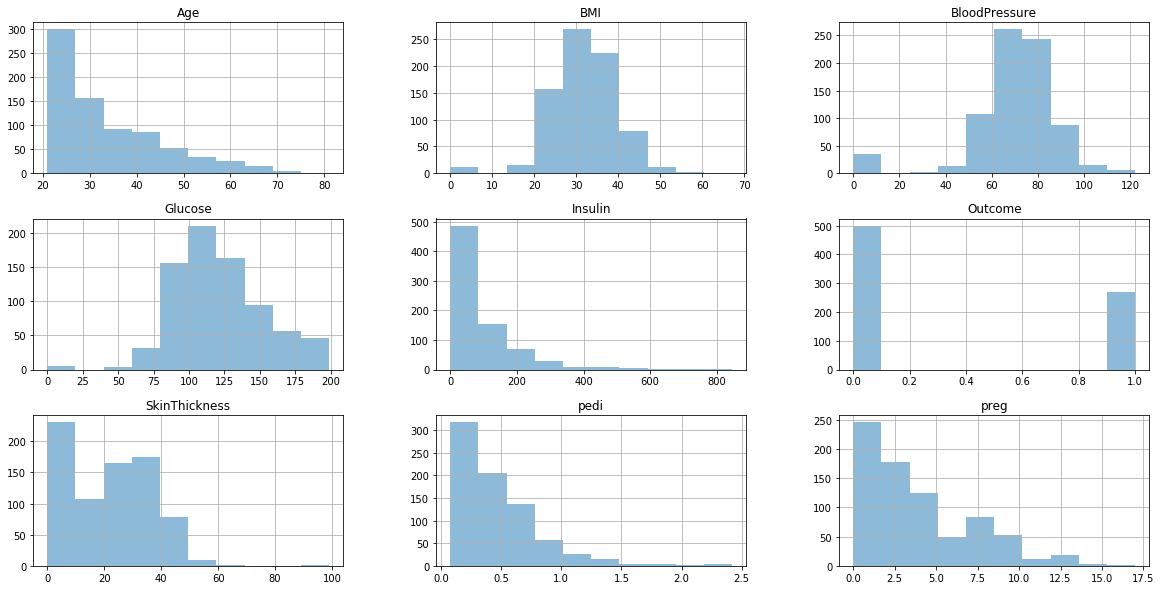

In [6]:
data.hist(alpha=0.5, figsize=(20, 10))  # alpha for transparency
pyplot.show()

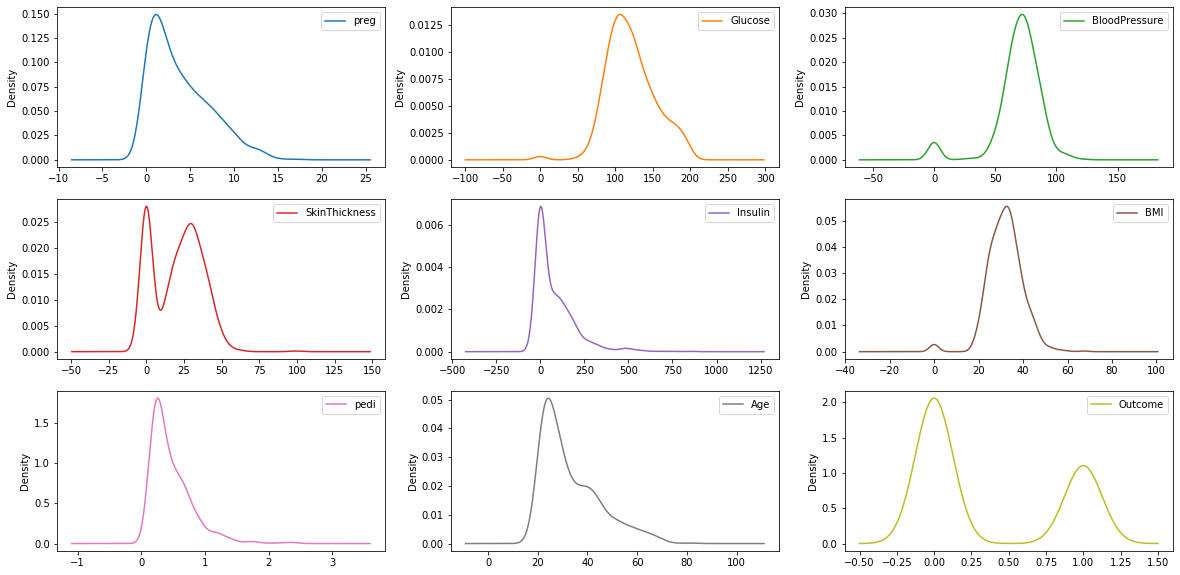

In [7]:
data.plot(kind='density', figsize=(20, 10),subplots=True, layout=(3,3), sharex=False) # Density plots
# sharex= False so that each subplot has its own axis
pyplot.show()

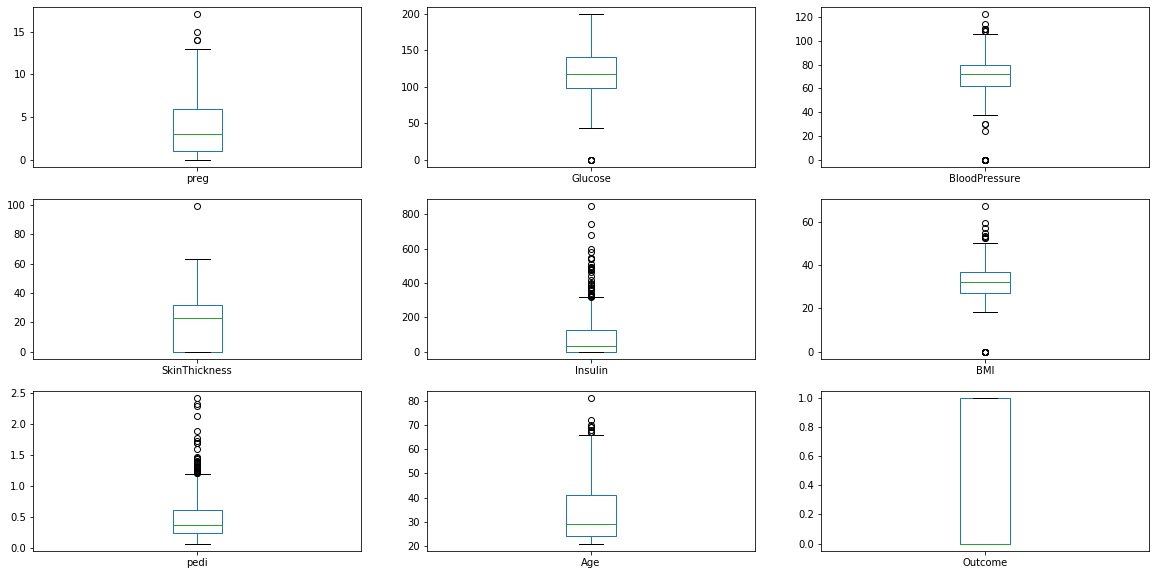

In [8]:
data.plot(kind='box', figsize=(20, 10),subplots=True, layout=(3,3), sharex=False, sharey=False) # Box and Whisker plot
pyplot.show()
# age, test and skin appear quite skewed towards smaller values.

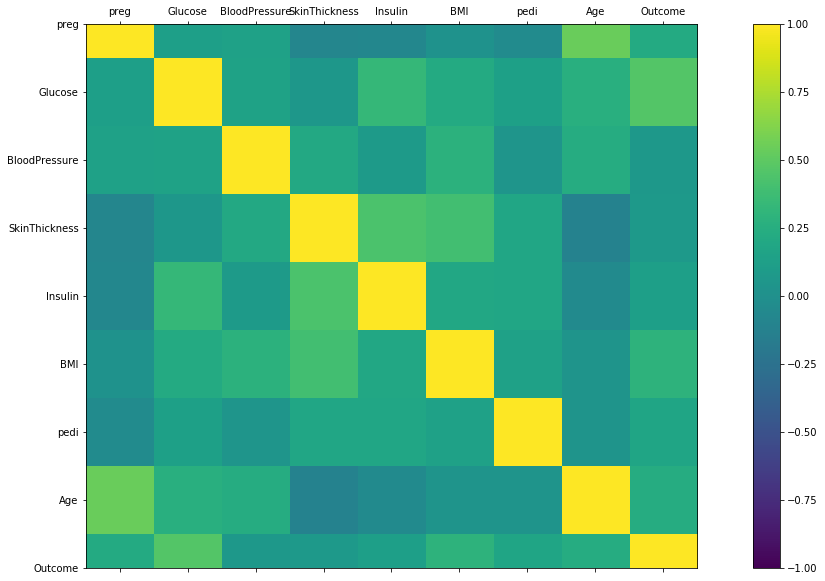

In [9]:
import numpy as np
correlations = data.corr() 
# plot correlation matrix 
fig = pyplot.figure(figsize=(20, 10)) 
ax = fig.add_subplot(111) # "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,9,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(['preg',  'Glucose',  'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI','pedi',   'Age',  'Outcome']) 
ax.set_yticklabels(['preg',  'Glucose',  'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI','pedi',   'Age',  'Outcome']) 
pyplot.show()


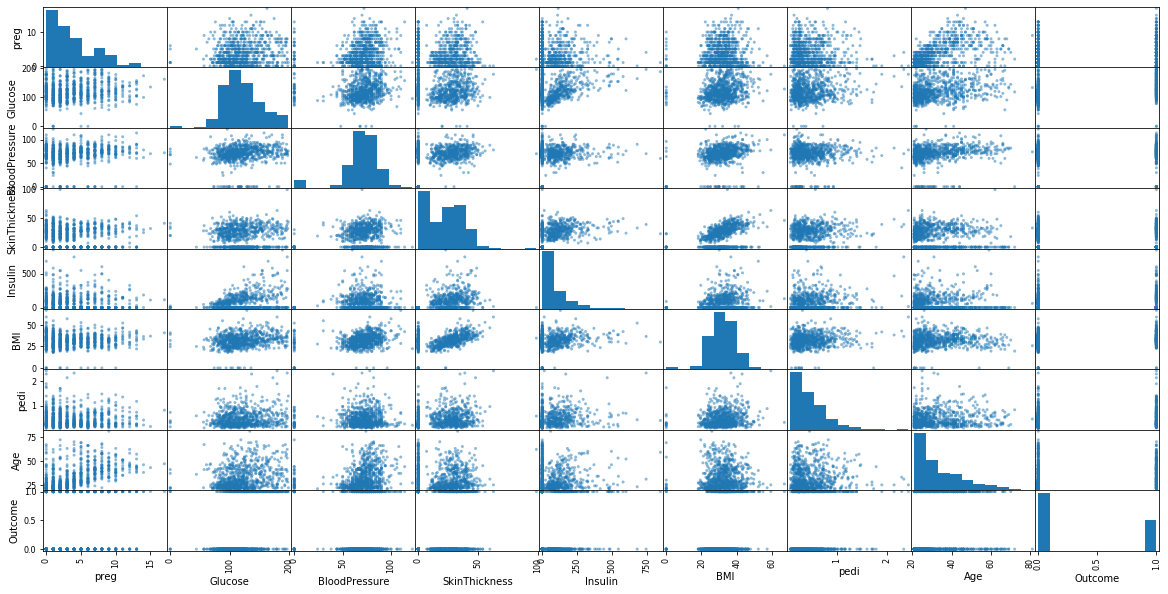

In [10]:
# Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20, 10)) 
pyplot.show()

In [11]:
# Scaling- Attributes are often rescaled into the range between 0 and 1.
# Useful for algorithms that weight inputs like regression and neural networks 
# and algorithms that use distance measures like k-Nearest Neighbors. 

from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler 
array = data.values 
# separate array into input and output components 
X = array[:,0:8] 
Y = array[:,8] 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X) 
# summarize transformed data 
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [12]:
# Standardization is a useful technique to transform attributes with a Gaussian distribution 
# and diﬀering means and standard deviations to a standard Gaussian distribution 
# with a mean of 0 and a standard deviation of 1
# Useful for linear regression, logistic regression and linear discriminate analysis

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 
# summarize transformed data 
set_printoptions(precision=3) 
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [13]:
# Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm)
# Useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms 
# that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors

from sklearn.preprocessing import Normalizer 
scaler = Normalizer().fit(X) 
normalizedX = scaler.transform(X) 
# summarize transformed data 
set_printoptions(precision=3) 
print(normalizedX[0:5,:])


[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [14]:
# Binarization 
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X) 
binaryX = binarizer.transform(X) 
# summarize transformed data 
set_printoptions(precision=3) 
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection

In [15]:
# Univariate Selection- Selecting k best features

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
test = SelectKBest(score_func=chi2, k=4) 
fit = test.fit(X, Y) 
set_printoptions(precision=3) 
print(fit.scores_) 
features = fit.transform(X) 
# summarize selected features 
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [16]:
# Recursive Feature Elimination (or RFE) works by recursively removing attributes 
# and building a model on those attributes that remain. 
# It uses the model accuracy to indentify which feature combination is the best

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs') 
rfe = RFE(model, 3) 
fit = rfe.fit(X, Y) 
print("Num Features: %d" % (fit.n_features_,) )
print("Selected Features: %s" % (fit.support_,)) 
print("Feature Ranking: %s" % (fit.ranking_,))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


In [17]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA


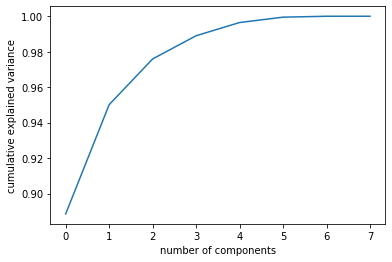

In [18]:
pca = PCA().fit(X)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.xlabel('number of components')
pyplot.ylabel('cumulative explained variance');

In [19]:
# So we choose n = 4
pca = PCA(n_components=4) 
fit = pca.fit(X) 
print("Explained Variance: %s" % (fit.explained_variance_ratio_ ,))
print(fit.components_)

Explained Variance: [0.889 0.062 0.026 0.013]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]
 [-4.905e-02  1.198e-01 -2.627e-01  8.844e-01 -6.555e-02  1.928e-01
   2.699e-03 -3.010e-01]]


In [20]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit(X, Y) 
print(model.feature_importances_)


[0.114 0.237 0.098 0.081 0.074 0.143 0.118 0.136]


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The scores suggest at the importance of glucose, BMI and age.

# Evaluate the Performance

In [21]:
# Train-Test split
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
test_size = 0.33 
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0,))


Accuracy: 78.740%


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
# K fold cross validation

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
num_folds = 10 
seed = 7 
kfold = KFold(n_splits=num_folds, random_state=seed) 
model = LogisticRegression(solver='lbfgs') 
results = cross_val_score(model, X, Y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Accuracy: 76.823% (5.191%)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

reported both the mean and the standard deviation

In [23]:
# Evaluate using Leave One Out Cross Validation 
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
num_folds = 10 
loocv = LeaveOneOut() 
model = LogisticRegression() 
results = cross_val_score(model, X, Y, cv=loocv) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 76.953% (42.113%)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 76.953% (42.113%)

In [24]:
# # Evaluate using Shuffle Split Cross Validation 
# This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold process
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
n_splits = 10 
test_size = 0.33
seed = 7 
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed) 
model = LogisticRegression() 
results = cross_val_score(model, X, Y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.496% (1.698%)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

This section lists some tips to consider what resampling technique to use in diﬀerent circumstances.
 Generally k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
 Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.
 Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

The best advice is to experiment and ﬁnd a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.


# Algorithm Evaluation Metrics

 For classiﬁcation metrics, the Pima Indians onset of diabetes dataset is used as demonstration. This is a binary classiﬁcation problem where all of the input variables are numeric.
 For regression metrics, the Boston House Price dataset is used as demonstration. this is a regression problem where all of the input variables are also numeric.

 A 10-fold cross validation test harness is used to demonstrate each metric, because this is the most likely scenario you will use when employing diﬀerent algorithm evaluation metrics. 

A caveat in these recipes is the cross validation.cross val score function1 used to report the performance in each recipe. It does allow the use of diﬀerent scoring metrics that will be discussed, but all scores are reported so that they can be sorted in ascending order (largest score is best). Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross validation.cross val score() function. This is important to note, because some scores will be reported as negative that by deﬁnition can never be negative

# Classiﬁcation Metrics


Classiﬁcation accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classiﬁcation problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classiﬁcation accuracy.


In [25]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression() 
scoring = 'accuracy' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.770 (0.048)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of conﬁdence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the conﬁdence of the prediction.

In [26]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression() 
scoring = 'neg_log_loss' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logloss: -0.493 (0.047)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under ROC Curve (or AUC for short) is a performance metric for binary classiﬁcation problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random

In [27]:
# Cross Validation Classification ROC AUC
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression() 
scoring = 'roc_auc' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

AUC: 0.823 (0.041)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation Classification Confusion Matrix 


In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
test_size = 0.33
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
model = LogisticRegression() 
model.fit(X_train, Y_train) 
predicted = model.predict(X_test) 
matrix = confusion_matrix(Y_test, predicted) 
print(matrix)


[[141  21]
 [ 41  51]]


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation Classification Report 

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
test_size = 0.33 
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
model = LogisticRegression() 
model.fit(X_train, Y_train) 
predicted = model.predict(X_test) 
report = classification_report(Y_test, predicted) 
print(report)


              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Regression Metrics


In [30]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 
filename = 'housing.csv' 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv(filename, header=None, delimiter=r"\s+", names=column_names)

print(data.shape)


(506, 14)


In [31]:
print(data.head(5))

       CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  6.32e-03  18.0   2.31     0  0.54  6.58  65.2  4.09    1  296.0     15.3  396.90   4.98  24.0
1  2.73e-02   0.0   7.07     0  0.47  6.42  78.9  4.97    2  242.0     17.8  396.90   9.14  21.6
2  2.73e-02   0.0   7.07     0  0.47  7.18  61.1  4.97    2  242.0     17.8  392.83   4.03  34.7
3  3.24e-02   0.0   2.18     0  0.46  7.00  45.8  6.06    3  222.0     18.7  394.63   2.94  33.4
4  6.91e-02   0.0   2.18     0  0.46  7.15  54.2  6.06    3  222.0     18.7  396.90   5.33  36.2


Mean Absolute Error

In [32]:
array = data.values 
X = array[:,0:13] 
Y = array[:,13] 
kfold = KFold(n_splits=10, random_state=7) 
model = LinearRegression() 
scoring = 'neg_mean_absolute_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))


MAE: -4.005 (2.084)


Mean squared error

In [33]:
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -34.705 (45.574)


The R2 (or R Squared) metric provides an indication of the goodness of ﬁt of a set of predictions to the actual values. In statistical literature this measure is called the coeﬃcient of determination. This is a value between 0 and 1 for no-ﬁt and perfect ﬁt respectively.

In [34]:
scoring = 'r2' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))


R^2: 0.203 (0.595)


# Spot-Check Classiﬁcation Algorithms


 Try a mixture of algorithm representations (e.g. instances and trees).
 Try a mixture of learning algorithms (e.g. diﬀerent algorithms for learning the same type of representation).
 Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).


We are going to take a look at six classiﬁcation algorithms that you can spot-check on your dataset. Starting with two linear machine learning algorithms:
 Logistic Regression.
 Linear Discriminant Analysis.
Then looking at four nonlinear machine learning algorithms:
 k-Nearest Neighbors.
 Naive Bayes.
 Classiﬁcation and Regression Trees.
 Support Vector Machines.

In [37]:
# Logistic Regression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 

filename = 'diabetes.csv' 
data = read_csv(filename) 
data=data.rename(columns={"Pregnancies": "preg", "DiabetesPedigreeFunction": "pedi"})
array = data.values 
X = array[:,0:8] 
Y = array[:,8] 
num_folds = 10
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7695146958304853


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [38]:
#LinearDiscriminantAnalysis
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = LinearDiscriminantAnalysis() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.773462064251538


In [39]:
# KNN
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 

num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = KNeighborsClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.7265550239234451


In [40]:
# Naive Bayes
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7) 
model = GaussianNB() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7551777170198223


In [41]:
# CART Classification 

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.683492822966507


In [43]:
# SVM Classifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC 
kfold = KFold(n_splits=10, random_state=7) 
model = SVC() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.6510252904989747


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Spot-Check Regression Algorithms


 Starting with four linear machine learning algorithms:
 Linear Regression.
 Ridge Regression.
 LASSO Linear Regression.
 Elastic Net Regression.
Then looking at three nonlinear machine learning algorithms:
 k-Nearest Neighbors.
 Classiﬁcation and Regression Trees.
 Support Vector Machines.


In [45]:
filename = 'housing.csv' 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, header=None, delimiter=r"\s+", names=column_names)
array = dataframe.values 
X = array[:,0:13] 
Y = array[:,13] 

In [46]:
# Linear Regression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, random_state=7) 
model = LinearRegression() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


-34.70525594452485


In [47]:
# Ridge Regression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge 
kfold = KFold(n_splits=10, random_state=7) 
model = Ridge() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


-34.07824620925929


In [48]:
# Lasso Regression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso
kfold = KFold(n_splits=10, random_state=7) 
model = Lasso() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-34.46408458830232


ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coeﬃcients) by penalizing the model using both the L2-norm (sum squared coeﬃcient values) and the L1-norm (sum absolute coeﬃcient values). 

In [49]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import ElasticNet 
kfold = KFold(n_splits=10, random_state=7) 
model = ElasticNet() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-31.164573714249762


In [50]:
# KNN Regression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor 
kfold = KFold(n_splits=10, random_state=7) 
model = KNeighborsRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


-107.28683898039215


In [51]:
# Decision Tree Regression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor 
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


-37.36487960784313


In [52]:
# SVM Regression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVR  # Support Vector Regression
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7)
model = SVR() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

-91.04782433324428


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Compare Machine Learning Algorithms (Summarizing above)

In [53]:
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

filename = 'diabetes.csv' 
data = read_csv(filename) 
data=data.rename(columns={"Pregnancies": "preg", "DiabetesPedigreeFunction": "pedi"})
array = data.values 
X = array[:,0:8] 
Y = array[:,8] 

# prepare models 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg) 


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.699094 (0.056602)
NB: 0.755178 (0.042766)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.651025 (0.072141)


LR and LDA seem to be the best for this problem

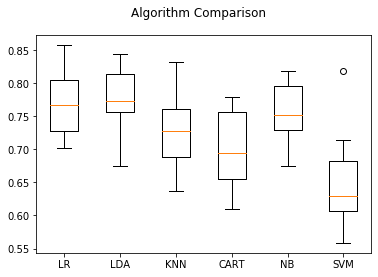

In [56]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Pipelines (Prevents Data leakage)

An easy trap to fall into in applied machine learning is leaking data from your training dataset to your test dataset. 


Data preparation
is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been inﬂuenced by the scale of the data in the test set. Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure. 

In [61]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

filename = 'diabetes.csv' 
data = read_csv(filename) 
data=data.rename(columns={"Pregnancies": "preg", "DiabetesPedigreeFunction": "pedi"})
array = data.values 
X = array[:,0:8] 
Y = array[:,8]  
# create pipeline 
estimators = [] 
estimators.append(('standardize', StandardScaler())) 
estimators.append(('lda', LinearDiscriminantAnalysis())) 
model = Pipeline(estimators) 
# evaluate pipeline 
kfold = KFold(n_splits=10, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.773462064251538


Feature extraction is another procedure that is susceptible to data leakage.

In [62]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import FeatureUnion 
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 

# create feature union 
features = [] 
features.append(('pca', PCA(n_components=3))) 
features.append(('select_best', SelectKBest(k=6))) 
feature_union = FeatureUnion(features) 
# create pipeline 
estimators = [] 
estimators.append(('feature_union', feature_union)) 
estimators.append(('logistic', LogisticRegression())) 
model = Pipeline(estimators) 
# evaluate pipeline 
kfold = KFold(n_splits=10, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.7760423786739576


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Improve Performance with Ensembles


In [63]:
# Bagged Decision Trees for Classification 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

seed = 7 
kfold = KFold(n_splits=10, random_state=seed) 
cart = DecisionTreeClassifier() 
num_trees = 100 
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.770745044429255


In [64]:
# Random Forest Classification 
# Random Forests is an extension of bagged decision trees. Rather than greedily choosing the best split point 
# in the construction of each tree, only a random subset of features are considered for each split. 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier 

num_trees = 100 
max_features = 3 
kfold = KFold(n_splits=10, random_state=7) 
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.7720950102529051


In [65]:
# Extra Trees are another modiﬁcation of bagging where random trees are constructed from samples of the training dataset. 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier 
num_trees = 100 
max_features = 7 
kfold = KFold(n_splits=10, random_state=7) 
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7681305536568694


In [66]:
# Adaboost  It generally works by weighting instances in the dataset by how easy or difficult they are to classify, 
# allowing the algorithm to pay or less attention to them in the construction of subsequent models.
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import AdaBoostClassifier 

num_trees = 30 
seed=7 
kfold = KFold(n_splits=10, random_state=seed) 
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.760457963089542


In [67]:
# Stochastic Gradient Boosting Classification 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import GradientBoostingClassifier 
seed = 7 
num_trees = 100 
kfold = KFold(n_splits=10, random_state=seed) 
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.7681989063568012


In [68]:
# Voting method
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7) 
# create the sub models 
estimators = [] 
model1 = LogisticRegression() 
estimators.append(('logistic', model1)) 
model2 = DecisionTreeClassifier() 
estimators.append(('cart', model2)) 
model3 = SVC() 
estimators.append(('svm', model3)) 
# create the ensemble model 
ensemble = VotingClassifier(estimators) 
results = cross_val_score(ensemble, X, Y, cv=kfold) 
print(results.mean())


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

0.7330143540669856


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

# Improve Performance with Algorithm Tuning


 Algorithm tuning is a ﬁnal step in the process of applied machine learning before ﬁnalizing your model. 
 It is sometimes called hyperparameter optimization where the algorithm parameters are referred to as hyperparameters,
 whereas the coefficients found by the machine learning algorithm itself are referred to as parameters.
 Optimization suggests the search-nature of the problem. Phrased as a search problem, 
 you can use diﬀerent search strategies to ﬁnd a good and robust parameter or set of parameters for an algorithm on a given problem. 

In [70]:
# Grid search is an approach to parameter tuning that will methodically build 
# and evaluate a model for each combination of algorithm parameters speciﬁed in a grid. 

import numpy
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0]) 
param_grid = dict(alpha=alphas) 
model = Ridge() 
grid = GridSearchCV(estimator=model, param_grid=param_grid) 
grid.fit(X, Y) 
print(grid.best_score_) 
print(grid.best_estimator_.alpha)


0.2796175593129722
1.0


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [71]:
# Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution 
# for a ﬁxed number of iterations. A model is constructed and evaluated for each combination of parameters chosen. 

from scipy.stats import uniform 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()} 
model = Ridge() 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7) 
rsearch.fit(X, Y) 
print(rsearch.best_score_) 
print(rsearch.best_estimator_.alpha)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.27961712703051084
0.9779895119966027


# Save, Load and Serialize Machine Learning Models

In [75]:
# Using Pickle
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from pickle import dump 
from pickle import load 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) 
# Fit the model on 33% 
model = LogisticRegression() 
model.fit(X_train, Y_train) 
# save the model to disk 
filename = 'finalized_model.sav' 
dump(model, open(filename, 'wb'))


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
# load the model from disk 
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test) 
print(result)

0.7559055118110236


In [77]:
# Save Model Using joblib 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.externals.joblib import dump 
from sklearn.externals.joblib import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) 
model = LogisticRegression() 
model.fit(X_train, Y_train)
# save the model to disk 
filename = 'finalized_model.sav' 
dump(model, filename)


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['finalized_model.sav']

In [78]:
# load the model from disk 
loaded_model = load(filename) 
result = loaded_model.score(X_test, Y_test) 
print(result)


0.7559055118110236
